In [24]:
#import all the neccesary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("SR386_labels.csv")

In [25]:
df.sample(20)

,case_id,died_within_5_years,days_till_death,crc_primary_cause_of_death,age_at_diagnosis,sex,site_of_tumour,site_of_tumour_grouping,kras_ex_2,kras_ex_3,...,pN,pM,tumour_type,differentiation,peri_surface_involved,distance_to_peritoneum_macroscopic_measurement,em_lvi,em_lvi_notes,pre-op_radio,pre-op_chemo
113,166,1.0,1476,1.0,62,M,transverse colon,transverse colon,WT,WT,...,N1,NaN,A/C,Mod,Y,0mm,Y,Venous,-,-
91,130,0.0,Alive,NaN,59,M,rectum,rectum,WT,WT,...,N0,cM1,A/C,Mod,N,18mm,N,NaN,Y,N
98,140,0.0,Alive,NaN,61,M,sigmoid colon,sigmoid colon,M (G12C),WT,...,N2,NaN,A/C,Mod,N,1mm,N,Intramural venous,-,-
288,407,0.0,Alive,NaN,75,M,rectum,rectum,WT,WT,...,N0,NaN,A/C,Mod,N,-,N,Intramural venous,Y,N
38,56,0.0,Alive,NaN,78,M,sigmoid colon,sigmoid colon,WT,WT,...,N0,NaN,A/C,Mod,N,0.5mm,N,Intramural venous,-,-
390,535,0.0,Alive,NaN,58,M,sigmoid colon,sigmoid colon,WT,WT,...,N0,NaN,A/C,Mod,-,<0.5mm,Y,Extra and intramural venous,-,-
195,278,0.0,Alive,NaN,74,M,hepatic flexure,hepatic flexure,WT,WT,...,N0,NaN,A/C (mucinous),Mod,N,2mm,N,NaN,-,-
346,480,1.0,1567,1.0,57,F,caecum,caecum,WT,WT,...,N0,NaN,A/C,Well,Y,0mm,N,NaN,-,-
417,572,0.0,Alive,NaN,78,F,caecum,caecum,M (G12C),WT,...,N0,NaN,A/C,Mod,N,0.5mm,N,NaN,-,-
324,452,0.0,Alive,NaN,74,M,rectum,rectum,WT,WT,...,N1,NaN,A/C,Mod (areas of focal poor),N,-,Y,Lymphatic and venous,-,-


In [54]:
#Initial EDA of data
df.info() #Show datatypes
df.describe(include='all').transpose()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 1 to 426
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   died_within_5_years                       420 non-null    int64  
 1   age_at_diagnosis                          420 non-null    float64
 2   male                                      420 non-null    int64  
 3   kras_ex_2                                 420 non-null    int64  
 4   kras_ex_3                                 420 non-null    int64  
 5   kras_codon_117                            420 non-null    int64  
 6   nras_ex_2                                 420 non-null    int64  
 7   braf_mutant_status                        420 non-null    int64  
 8   mmr_loss_binary                           420 non-null    int64  
 9   stage                                     420 non-null    float64
 10  stage_subgroup                            4

,count,mean,std,min,25%,50%,75%,max
died_within_5_years,420.0,0.373810,0.484391,0.0,0.000000,0.0000,1.000000,1.0
age_at_diagnosis,420.0,0.545238,0.186124,0.0,0.406250,0.5625,0.687500,1.0
male,420.0,0.538095,0.499141,0.0,0.000000,1.0000,1.000000,1.0
kras_ex_2,420.0,0.316667,0.465731,0.0,0.000000,0.0000,1.000000,1.0
kras_ex_3,420.0,0.026190,0.159892,0.0,0.000000,0.0000,0.000000,1.0
kras_codon_117,420.0,0.052381,0.223060,0.0,0.000000,0.0000,0.000000,1.0
nras_ex_2,420.0,0.019048,0.136855,0.0,0.000000,0.0000,0.000000,1.0
braf_mutant_status,420.0,0.109524,0.312668,0.0,0.000000,0.0000,0.000000,1.0
mmr_loss_binary,420.0,0.076190,0.265619,0.0,0.000000,0.0000,0.000000,1.0
stage,420.0,0.408333,0.265210,0.0,0.250000,0.5000,0.500000,1.0


In [27]:
df.isna().sum()

case_id                                             0
died_within_5_years                                 2
days_till_death                                     2
crc_primary_cause_of_death                        332
age_at_diagnosis                                    0
sex                                                 0
site_of_tumour                                      2
site_of_tumour_grouping                             2
kras_ex_2                                           0
kras_ex_3                                           0
kras_codon_117                                      0
nras_ex_2                                           0
nras_ex_3                                           0
braf_mutant_status                                  0
mmr_ihc                                             0
mmr_loss_binary                                     0
primary_metastatic                                  0
stage                                               1
stage_subgroup              

In [28]:
#EDA of the attributes
for attribute in df.columns: #After age_at_diagnosis attribute
    print("Missing values: ",df[attribute].isna().sum())
    #Show unique value counts
    print("Unique values count:",df[attribute].nunique())
    print(df[attribute].value_counts())
    print()

Missing values:  0
Unique values count: 427
case_id
1      1
3      1
4      1
6      1
7      1
      ..
578    1
580    1
581    1
582    1
583    1
Name: count, Length: 427, dtype: int64

Missing values:  2
Unique values count: 2
died_within_5_years
0.0    264
1.0    161
Name: count, dtype: int64

Missing values:  2
Unique values count: 157
days_till_death
Alive    264
1188       2
350        2
643        2
331        2
        ... 
442        1
159        1
1148       1
1693       1
1296       1
Name: count, Length: 157, dtype: int64

Missing values:  332
Unique values count: 1
crc_primary_cause_of_death
1.0    95
Name: count, dtype: int64

Missing values:  0
Unique values count: 56
age_at_diagnosis
75    21
76    17
71    17
59    17
61    16
69    15
66    15
74    14
83    13
58    13
80    13
63    12
78    11
67    11
82    10
79    10
55    10
77    10
60    10
81    10
70    10
65     9
68     9
64     8
52     8
57     8
72     8
62     7
49     7
73     7
50     7
85     7

In [29]:
#Dropping attributes
df=df.drop(labels=["case_id","days_till_death"],axis=1) #Drop case_id since not needed
#days_till_death cannot be used, since if "days_till_death" = Alive -> died_within_5_years = 0, and 1 otherwise
df=df.drop(labels=["crc_primary_cause_of_death","pM","em_lvi_notes","distance_to_peritoneum_macroscopic_measurement","pre-op_radio","pre-op_chemo"],axis=1) #Too many missing values
df=df.drop(labels=["primary_metastatic","tumour_type"],axis=1) #For primary_metastatic, the whole column is entirely "P". For tumour_type, it is entirely filled with "A/C"

died_within_5_years
0    264
1    161
Name: count, dtype: int64


<Axes: xlabel='died_within_5_years', ylabel='Count'>

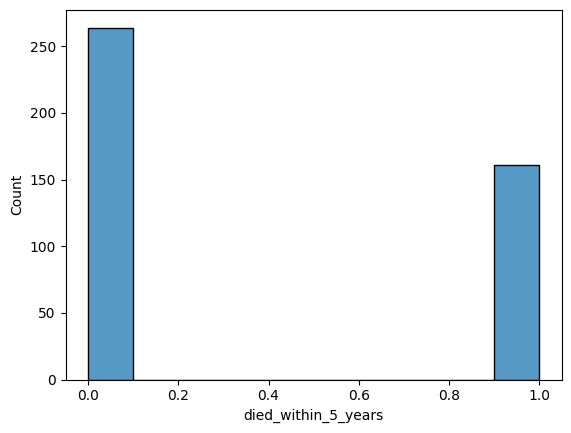

In [30]:
#Remove all empty records of "died_within_5_years" since results is unknown
df = df[df["died_within_5_years"].isna() == False]
df["died_within_5_years"]=df["died_within_5_years"].astype(int) #Convert to int64 datatype
print(df["died_within_5_years"].value_counts())

#Visualizations of distribution
sns.histplot(df["died_within_5_years"])

Missing values:  0
sex
M    229
F    196
Name: count, dtype: int64


<Axes: xlabel='male', ylabel='Count'>

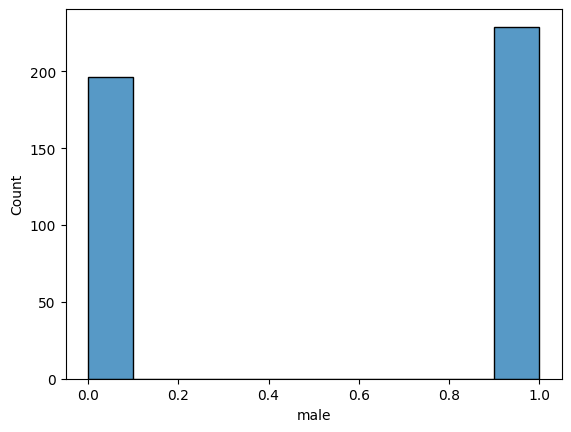

In [31]:
#Cleaning the sex attribute
print("Missing values: ",df['sex'].isna().sum())
print(df['sex'].value_counts())
#Data preprocessing to convert sex to binary: M = 1 & F = 0
df['sex'] = df['sex'].map({'M': 1, 'F': 0,})
df.rename(columns={'sex': 'male'}, inplace=True)
df['male'] = df['male'].astype(int)
df['male'].value_counts()

#Visualizations of distribution
sns.histplot(df["male"])

In [32]:
#Cleaning the site_of_tumour attribute
print("Missing values: ",df['site_of_tumour'].isna().sum())
#Fill in the missing values with the attribute mode (Categorical values)
df['site_of_tumour']=df['site_of_tumour'].fillna(df['site_of_tumour'].mode()[0])

#Show unique value counts
print("Unique values count:",df['site_of_tumour'].nunique())
print(df['site_of_tumour'].value_counts())

#Replace unique value where counts <=2 with "others"
counts = df['site_of_tumour'].value_counts()
unique = list(counts[counts<=2].index)
df['site_of_tumour']=df['site_of_tumour'].replace(unique,"others")

Missing values:  2
Unique values count: 32
site_of_tumour
rectum                           99
sigmoid colon                    71
caecum                           54
ascending colon                  41
rectosigmoid                     40
transverse colon                 22
upper rectum                     15
splenic flexure                  14
lower rectum                     12
descending colon                 10
distal sigmoid colon              8
sigmoid                           7
hepatic flexure                   7
caecum/ascending colon            6
distal sigmoid                    2
left colon                        1
proximal descending colon         1
descending/sigmoid junction??     1
ascending/transverse colon        1
proximal ascending colon          1
lower caecum                      1
distal descending colon           1
upper rectum/sigmoid              1
caecum/ileocaecal valve           1
caecum/small bowel                1
proximal transverse colon         1
right 

In [33]:
#Cleaning the site_of_tumour_grouping attribute
print("Missing values: ",df['site_of_tumour_grouping'].isna().sum())
#Fill in the missing values with the attribute mode (Categorical values)
df['site_of_tumour_grouping']=df['site_of_tumour_grouping'].fillna(df['site_of_tumour_grouping'].mode()[0])

#Show unique value counts
print("Unique values count:",df['site_of_tumour_grouping'].nunique())
print(df['site_of_tumour_grouping'].value_counts())

Missing values:  2
Unique values count: 8
site_of_tumour_grouping
rectum              167
sigmoid colon        89
caecum               65
ascending colon      43
transverse colon     25
descending colon     15
splenic flexure      14
hepatic flexure       7
Name: count, dtype: int64


In [34]:
#Dealing with FAIL values
print(df[(df["kras_ex_2"]=="FAIL") | (df["braf_mutant_status"]=="FAIL")].to_string()) #Inspecting the row

#Dropping these row since, too many FAIL in many column
df=df[(df["kras_ex_2"]!="FAIL") & (df["braf_mutant_status"]!="FAIL")]

     died_within_5_years  age_at_diagnosis  male    site_of_tumour site_of_tumour_grouping kras_ex_2 kras_ex_3 kras_codon_117 nras_ex_2 nras_ex_3 braf_mutant_status  mmr_ihc  mmr_loss_binary stage stage_subgroup    pT  pN differentiation peri_surface_involved em_lvi
183                    1                75     0  transverse colon        transverse colon      FAIL      FAIL             WT      FAIL      FAIL          M (V600E)  NO LOSS                0     4              4  ypT3  N0             Mod                     N      N
229                    0                50     1      lower rectum                  rectum        WT        WT           FAIL        WT        WT               FAIL  NO LOSS                0     1              1   pT2  N0            Poor                     N      N


In [35]:
#Dealing with the single instance of M (K117N) value in kras_codon_117 attribute
print(df[df["kras_codon_117"] == "M (K117N)"].to_string()) #Inspecting the instance

df = df[df["kras_codon_117"] != "M (K117N)"] #Dropping the single instance since one sample is unreliable

     died_within_5_years  age_at_diagnosis  male site_of_tumour site_of_tumour_grouping kras_ex_2 kras_ex_3 kras_codon_117 nras_ex_2 nras_ex_3 braf_mutant_status  mmr_ihc  mmr_loss_binary stage stage_subgroup   pT  pN differentiation peri_surface_involved em_lvi
267                    1                85     1         rectum                  rectum        WT        WT      M (K117N)        WT        WT                 WT  NO LOSS                0     2             2A  pT3  N0             Mod                     N      Y


In [36]:
#Cleaning attributes with unnecessary "M ..." values
M_attributes=["kras_ex_2","kras_ex_3","nras_ex_2","nras_ex_3","braf_mutant_status"]
for attribute in M_attributes:
    print(df[attribute].value_counts())
    df[attribute]=df[attribute].str.replace(r'^M.*', 'M', regex=True) #Replace any values start starts with "M" with "M"
    print()

kras_ex_2
WT          288
M (G12D)     52
M (G12V)     29
M (G13D)     18
M (G12C)     17
M (G12S)     12
M (G12A)      6
Name: count, dtype: int64

kras_ex_3
WT          411
M (Q61L)      4
M (Q61H)      3
M (Q61R)      2
M (G60V)      1
M (Q61K)      1
Name: count, dtype: int64

nras_ex_2
WT              413
M (G12D)          5
M (G12A)          2
M (G12V)          1
M (codon 14)      1
Name: count, dtype: int64

nras_ex_3
WT          404
FAIL         11
M (Q61L)      3
M (Q61K)      2
M (Q61R)      2
Name: count, dtype: int64

braf_mutant_status
WT                        376
M (V600E)                  37
M (V600E) - LOW LEVEL       5
M (V600E)                   1
M (D584N) - LOW LEVEL       1
M (S605G) - LOW LEVEL       1
M (R603Q) - LOW LEVEL)      1
Name: count, dtype: int64



In [37]:
#Dealing with binary values in kras_ex_2, kras_ex_3, nras_ex_2,braf_mutant_status, and kras_codon_117
for attribute in ["kras_ex_2","kras_ex_3","nras_ex_2","braf_mutant_status"]:
    df[attribute] = df[attribute].map({'WT': 0, 'M': 1}) #Mapping WT as 0 and M as 1
    print(df[attribute].value_counts())
    print()
df["kras_codon_117"] = df["kras_codon_117"].map({'WT': 0, 'FAIL': 1})

kras_ex_2
0    288
1    134
Name: count, dtype: int64

kras_ex_3
0    411
1     11
Name: count, dtype: int64

nras_ex_2
0    413
1      9
Name: count, dtype: int64

braf_mutant_status
0    376
1     46
Name: count, dtype: int64



In [38]:
#Cleaning the stage and stage_subgroup
print(df[df["stage"].isna() == True].to_string()) #Examaning the row where "stage" is empty
df=df[df["stage"].isna() == False] #Removing the row since too many columns are empty

#Performing ordinal encoding on the attributes
stage_mapping = {'1': 1, '2': 2, '3': 3, '3C': 4, '4': 5}
df['stage'] = df['stage'].map(stage_mapping)

stage_subgroup_map = {
    '1': 1,
    '2A': 2,
    '2B': 3,
    '3A': 4,
    '3B': 5,
    '3C': 6,
    '4': 7
}
df['stage_subgroup'] = df['stage_subgroup'].map(stage_subgroup_map)

     died_within_5_years  age_at_diagnosis  male site_of_tumour site_of_tumour_grouping  kras_ex_2  kras_ex_3  kras_codon_117  nras_ex_2 nras_ex_3  braf_mutant_status  mmr_ihc  mmr_loss_binary stage stage_subgroup   pT   pN differentiation peri_surface_involved em_lvi
321                    1                59     1         others                  caecum          0          0               0          1        WT                   0  NO LOSS                0   NaN            NaN  NaN  NaN             NaN                   NaN    NaN


In [39]:
#Cleaning the pT and pN attribute
attributes = ["pT","pN"]
for attribute in attributes:
    counts = df[attribute].value_counts()
    print (counts) #Print value counts
    other_values = list(counts[counts<=4].index) #Other values which their counts are <=4 (too rare)
    df[attribute] = df[attribute].replace(other_values,"others")
    print()

pT
pT3     209
pT2      69
pT4b     68
pT4      30
ypT3     17
pT1      12
pT4a     10
ypT2      3
ypT1      1
Pt3       1
pT        1
Name: count, dtype: int64

pN
N0      211
N1      118
N2       72
ypN2      4
pN1       4
pN0       4
pN2       4
NX        1
ypN0      1
Nx        1
ypN1      1
Name: count, dtype: int64



Missing values:  1
   died_within_5_years  age_at_diagnosis  male site_of_tumour site_of_tumour_grouping  kras_ex_2  kras_ex_3  kras_codon_117  nras_ex_2 nras_ex_3  braf_mutant_status  mmr_ihc  mmr_loss_binary  stage  stage_subgroup   pT      pN differentiation peri_surface_involved em_lvi
0                    1                91     0   lower rectum                  rectum          1          0               0          0        WT                   0  NO LOSS                0      1               1  pT2  others             NaN                   NaN    NaN
['Mod' 'Poor (areas of moderate)' 'Well (focally mod)'
 'Mod (focally poor)' 'Mod (foci of poor at invasive front)' 'Poor' 'Well'
 'Mod (predominantly)' 'Poor (some mod regions with medullary features)'
 'Well to Mod (mucinous component)'
 'Mod (leading edge poor with tumour budding)' 'Mod to Poor'
 'Mod (areas of poor)'
 'Mod (small focus of mucinous differentiation and small foci of poor)'
 'Mod (some foci of poor)' 'Mod (some area

<Axes: xlabel='differentiation', ylabel='Count'>

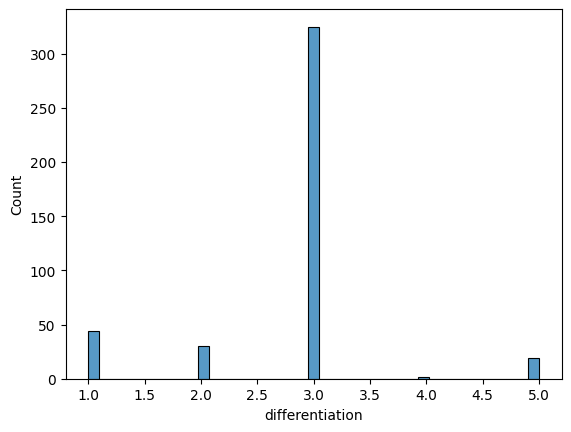

In [40]:
#Cleaning the differentiation attribute
print("Missing values: ", df["differentiation"].isna().sum())
print(df[df["differentiation"].isna()==True].to_string()) #Inspecting the missing value row
df = df[df["differentiation"].isna()==False] #Dropping the row since too many missing values

print(df["differentiation"].unique()) #Look at the unique values

def poor_mod_well(x):
    x=x.lower() #Convert all to lower case
    if "poor" in x and "mod" not in x:
        return 1 #poor
    elif "poor" in x and "mod" in x:
        return 2 #poor_mod
    elif "mod" in x and "well" not in x:
        return 3 #mod
    elif "mod" in x and "well" in x:
        return 4 #mod_well
    else:
        return 5 #well

df["differentiation"]=df["differentiation"].apply(poor_mod_well)

#Visualizations of distribution
sns.histplot(df["differentiation"])

peri_surface_involved
N                                           293
Y                                            93
Not identified                               13
-                                            10
??                                            3
N (N/A)                                       1
Absent                                        1
Not directly visualised but presumed yes      1
N?                                            1
Name: count, dtype: int64


<Axes: xlabel='peri_surface_involved', ylabel='Count'>

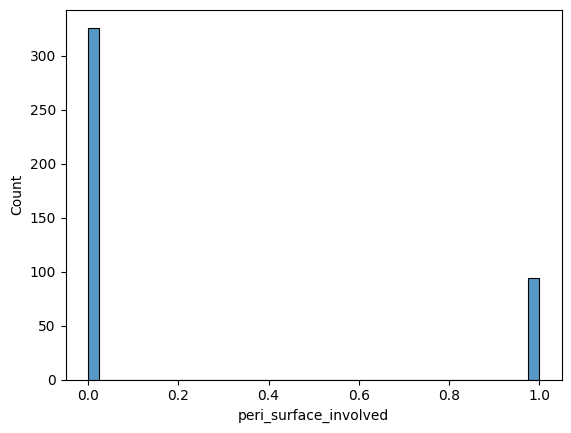

In [41]:
#Cleaning the peri_surface_involved attribute
print(df["peri_surface_involved"].value_counts())
df["peri_surface_involved"]=df["peri_surface_involved"].replace('Not directly visualised but presumed yes',"Y") 

def unknown(x):
    if x != "N" and x!="Y":
        return np.nan
    else:
        return x

df["peri_surface_involved"] = df["peri_surface_involved"].apply(unknown)

df["peri_surface_involved"]=df["peri_surface_involved"].fillna(df["peri_surface_involved"].mode()[0]) #Fill missing values with mode since categorical value
df["peri_surface_involved"]=df["peri_surface_involved"].map({'Y': 1, 'N': 0})

#Visualizations of distribution
sns.histplot(df["peri_surface_involved"])

Missing values:  1
em_lvi
N                 225
Y                 171
Not identified     18
Probable            2
-                   2
Not present         1
Name: count, dtype: int64


<Axes: xlabel='em_lvi', ylabel='Count'>

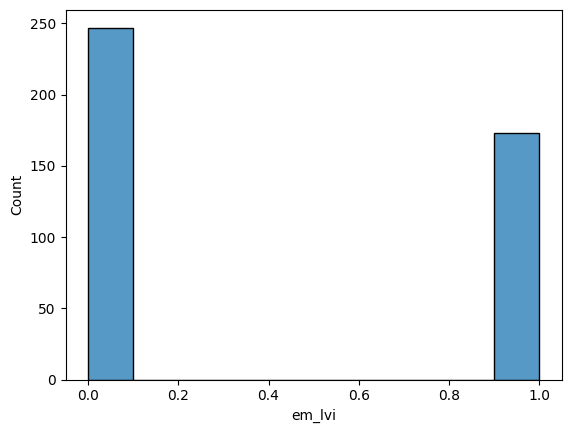

In [42]:
#Cleaning em_lvi attribute

#Checking missing values
print("Missing values: ",df["em_lvi"].isna().sum())

print(df["em_lvi"].value_counts()) #Inspecting value counts
df["em_lvi"]=df["em_lvi"].replace("Probable","Y")

df["em_lvi"]=df["em_lvi"].apply(unknown)

df["em_lvi"]=df["em_lvi"].fillna(df["em_lvi"].mode()[0]) #Fill missing values with mode since categorical value
df["em_lvi"]=df["em_lvi"].map({'Y': 1, 'N': 0})

#Visualizations of distribution
sns.histplot(df["em_lvi"])

In [43]:
#Perform one-hot encoding on catergorical attributes
df = pd.get_dummies(df,columns=["site_of_tumour","site_of_tumour_grouping","nras_ex_3","mmr_ihc","pT","pN"],drop_first=True,dtype=int)

In [44]:
#Scaling the ordinal attributes in the dataset
from sklearn.preprocessing import MinMaxScaler #MinMaxScaler since other values are 0 or 1 (binary value) so scaled values should be between 0-1
ordinal_attributes = ["age_at_diagnosis","stage","stage_subgroup","differentiation"]
scaler = MinMaxScaler()
df[ordinal_attributes] = scaler.fit_transform(df[ordinal_attributes])

In [53]:
#Splitting the dataset into test, train & val
from sklearn.model_selection import train_test_split
X=df.drop(labels="died_within_5_years",axis=1)
y=df["died_within_5_years"]
#Testing is 15% of original
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y) #Stratify to preserve class ratios

#Val is 15% of original, so of 85%, it is 15% of 85%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=15/85, random_state=42, stratify=y_train)

print("Train:", X_train.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)

Train: (293, 48)
Val: (64, 48)
Test: (63, 48)


In [46]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Force CPU
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


In [47]:
#Defining the architecture
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [49]:
#Compiling the model
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,601 (6.25 KB)

 Trainable params: 1,601 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
#Training the model
history = model.fit(
    X_train,y_train,
    validation_data = (X_val,y_val),
    epochs = 100,
    batch_size = 32,
    verbose=1
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4096 - auc: 0.3278 - loss: 0.7358 - val_accuracy: 0.5000 - val_auc: 0.3276 - val_loss: 0.7204
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4983 - auc: 0.3823 - loss: 0.6995 - val_accuracy: 0.5625 - val_auc: 0.3990 - val_loss: 0.6947
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5973 - auc: 0.4652 - loss: 0.6747 - val_accuracy: 0.6094 - val_auc: 0.4755 - val_loss: 0.6745
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6246 - auc: 0.5538 - loss: 0.6557 - val_accuracy: 0.6250 - val_auc: 0.5391 - val_loss: 0.6586
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6348 - auc: 0.6168 - loss: 0.6411 - val_accuracy: 0.6406 - val_auc: 0.6219 - val_loss: 0.6419
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6587 - auc: 0.6599 - loss: 0.6272 - val_accuracy: 0.6406 - val_auc: 0.6615 - val_loss: 0.6279
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms

In [59]:
pd.DataFrame(history.history)

,accuracy,auc,loss,val_accuracy,val_auc,val_loss
0,0.409556,0.327807,0.735789,0.500000,0.327604,0.720385
1,0.498294,0.382280,0.699480,0.562500,0.398958,0.694685
2,0.597270,0.465173,0.674655,0.609375,0.475521,0.674520
3,0.624573,0.553824,0.655709,0.625000,0.539062,0.658570
4,0.634812,0.616848,0.641136,0.640625,0.621875,0.641948
...,...,...,...,...,...,...
95,0.815700,0.901326,0.400102,0.750000,0.757292,0.612207
96,0.825939,0.902224,0.400230,0.750000,0.761458,0.614062
97,0.825939,0.902299,0.398523,0.765625,0.759896,0.615706
98,0.822526,0.903720,0.396328,0.781250,0.759896,0.617285


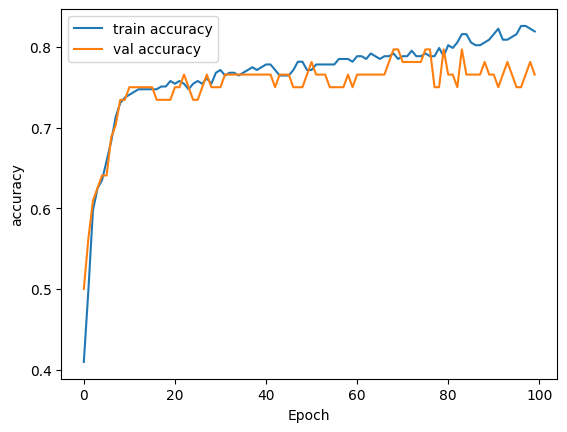

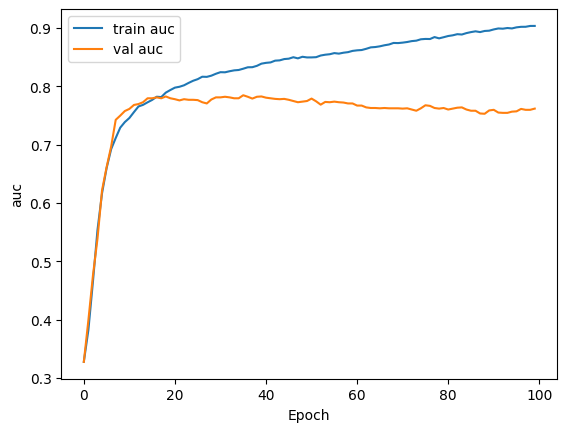

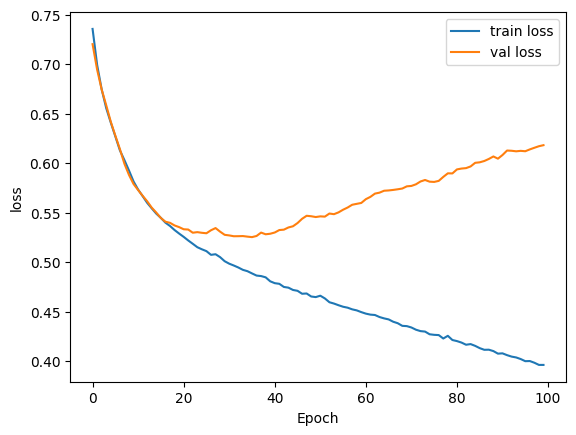

In [66]:
#Seeing how the metrics change for each epoch
metrics = ["accuracy","auc","loss"]
for metric in metrics:
    plt.plot(history.history[metric], label=f"train {metric}")
    plt.plot(history.history[f"val_{metric}"], label=f"val {metric}")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel(metric)
    plt.show()